In [3]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import f
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import xlrd as xl 
from pandas import ExcelWriter
from pandas import ExcelFile 
import math
import scipy.stats

In [4]:
df=pd.read_excel("ProRes_dataprepped_final2_2.xlsx",sheet_name='TrustKIQ2')
df.describe()
df.head(10)
print(df)

           IP address  Q2
0          82.66.93.1   6
1          82.66.93.1   6
2      179.43.184.106   4
3      179.43.184.106   2
4      179.43.184.106   7
5      179.43.184.106   2
6      179.43.184.106   1
7      179.43.184.106   9
8      179.43.184.106   9
9      179.43.184.106   0
10     87.214.203.245   5
11      83.52.149.253   8
12       82.43.216.71   7
13       2.85.196.239   7
14      77.96.231.202   9
15       92.0.122.188   8
16      176.58.195.89   6
17       90.255.204.3   0
18       151.0.95.132   7
19     90.202.106.104   7
20    108.171.128.173   4
21       2.87.252.245   8
22      193.136.53.11   5
23      83.240.61.206   7
24       82.68.224.22   0
25        82.27.98.74   6
26       86.8.206.213   4
27     90.218.158.207   6
28     82.159.112.163   7
29    213.205.240.214   6
...               ...  ..
1449   81.104.160.205   6
1450    2.223.108.230   6
1451    188.220.40.67   8
1452    90.220.216.59   7
1453     82.69.140.30   7
1454   85.253.195.243   9
1455   81.10

In [5]:
df.Q2.describe()

count    1479.000000
mean        5.740365
std         2.842065
min         0.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Q2, dtype: float64

In [6]:
df['Q2'].value_counts()

7     289
8     264
6     223
5     206
0     178
9     101
10     71
1      53
4      47
3      33
2      14
Name: Q2, dtype: int64

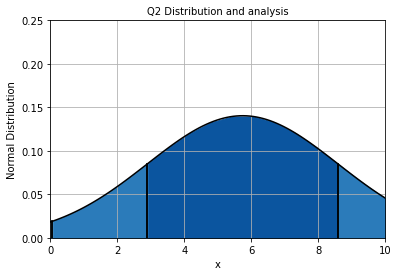

In [7]:
x_min = 0.0
x_max = 10.0

mean = 5.740365 
std = 2.842065

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 6

pt1 = mean + 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 10.0 *std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 7

pt1 = mean - 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 10.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.title('Q2 Distribution and analysis',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution_2.png")
plt.show()

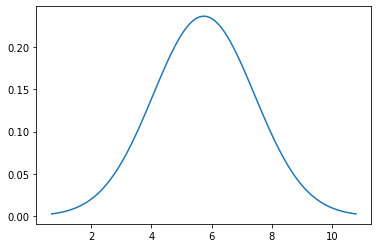

In [8]:
mu = 5.740365
variance = 2.842065
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

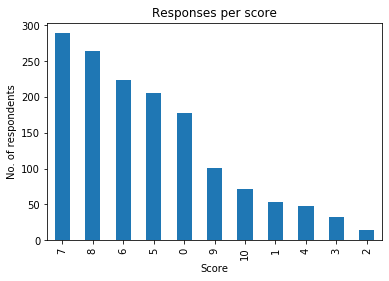

In [9]:
dfcount = df['Q2'].value_counts()
dfcount.plot(kind='bar')
plt.xlabel("Score") 
plt.ylabel("No. of respondents") 
plt.title("Responses per score") 
plt.show() 


In [10]:
df_players=pd.read_excel("ProRes_dataprepped_final2_2.xlsx",sheet_name='TrustPlayersKIQ3')
df_players.describe()
df_players.head(10)
print(df_players)

           IP address  Trust_players
0          82.66.93.1              5
1          82.66.93.1              0
2      179.43.184.106              0
3      179.43.184.106              0
4      179.43.184.106              0
5      179.43.184.106              0
6      179.43.184.106              0
7      179.43.184.106              0
8      179.43.184.106              0
9      179.43.184.106              0
10     87.214.203.245              0
11      83.52.149.253              8
12       82.43.216.71              6
13       2.85.196.239              8
14      77.96.231.202              7
15       92.0.122.188              8
16      176.58.195.89              5
17       90.255.204.3              0
18       151.0.95.132              6
19     90.202.106.104              8
20    108.171.128.173              4
21       2.87.252.245              6
22      193.136.53.11              6
23      83.240.61.206              7
24       82.68.224.22              0
25        82.27.98.74              6
2

In [11]:
df_players.Trust_players.describe()

count    1479.000000
mean        3.690331
std         3.380091
min         0.000000
25%         0.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Trust_players, dtype: float64

In [12]:
df_players['Trust_players'].value_counts()

0     578
7     177
6     174
5     170
8     139
4      57
1      48
10     45
3      39
9      38
2      14
Name: Trust_players, dtype: int64

In [13]:
# verifying the correlation between field trust and players
ttest,pval = stats.ttest_rel(df['Q2'], df_players['Trust_players'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.617103432696469e-121
reject null hypothesis


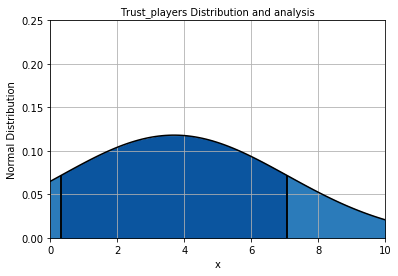

In [14]:
x_min = 0.0
x_max = 10.0

mean = 3.690331 
std = 3.380091

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 6

pt1 = mean + 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 10.0 *std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 7

pt1 = mean - 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 10.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.title('Trust_players Distribution and analysis',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution_2.png")
plt.show()

In [15]:
# alternate testing - measuring the influence between response 1 and 2
ztest ,pval1 = stests.ztest(df['Q2'], x2=df_players['Trust_players'], value=0,alternative='two-sided')
print(float(pval1))

2.758528149554379e-71


In [16]:
testdata = pd.read_excel("ProRes_dataprepped_final2_2.xlsx",sheet_name='Anova_prep')
testdata.head()
testdata.tail()

,Country,Trust_KI,Trust_KI_Players
1474,United Kingdom,0.0,0
1475,United Kingdom,0.0,0
1476,United Kingdom,0.0,0
1477,NaN,NaN,0
1478,NaN,NaN,0


In [17]:
dC = testdata.Trust_KI.dropna()
dT1 = testdata.Trust_KI_Players.dropna()

In [18]:
print('Trust_KI Control group\n')
print(dC.describe())
print('\nTrust_KI_Players group\n')
print(dT1.describe())

Trust_KI Control group

count    1477.000000
mean        5.737982
std         2.843192
min         0.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Trust_KI, dtype: float64

Trust_KI_Players group

count    1479.000000
mean        5.740365
std         2.842065
min         0.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Trust_KI_Players, dtype: float64


In [19]:
stats.shapiro(dC), stats.shapiro(dT1), 

((0.8814924955368042, 3.8011699275047253e-32),
 (0.8812650442123413, 3.43603610901078e-32))

In [20]:
stats.levene(dC, dT1)

LeveneResult(statistic=0.00016842089533157412, pvalue=0.9896464544616456)

In [21]:
F, p = stats.f_oneway(dC, dT1)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

F statistic = 0.001 and probability p = 0.982


In [22]:
t, p = stats.ttest_ind(dC, dT1)
print('Control vs T1:', t, p)


Control vs T1: -0.022786317033686512 0.981822261615402


In [24]:
import statsmodels.stats.multicomp as ml

# Note that data in sheet have been preformatted in Group and Score columns 
dtuk = pd.read_excel("ProRes_dataprepped_final2_2.xlsx",sheet_name='Anova_prep')
print(dtuk.head(),'\n')

mcobj = ml.MultiComparison(dtuk.Trust_KI, dtuk.Trust_KI_Players)
out = mcobj.tukeyhsd(0.05) 

print(out)
import warnings
warnings.filterwarnings("ignore")

   Country  Trust_KI  Trust_KI_Players
0  Austria       3.0                 8
1  Austria       5.0                 3
2  Austria       8.0                 5
3  Belgium       6.0                 8
4  Belgium       6.0                 6 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     0      1      nan 0.5566   nan   nan  False
     0      2      nan 0.5566   nan   nan  False
     0      3      nan 0.5566   nan   nan  False
     0      4      nan 0.5566   nan   nan  False
     0      5      nan 0.5566   nan   nan  False
     0      6      nan 0.5566   nan   nan  False
     0      7      nan 0.5566   nan   nan  False
     0      8      nan 0.5566   nan   nan  False
     0      9      nan 0.5566   nan   nan  False
     0     10      nan 0.5566   nan   nan  False
     1      2  -1.4717 0.5566   nan   nan  False
     1      3  -0.4111 0.5566   nan   nan  False
     1      4   0.2517 0.5